In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

In [3]:
x = iris.data[:,:2]
y = iris.target

No handles with labels found to put in legend.


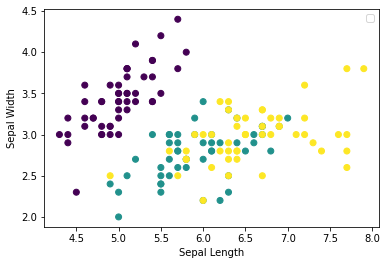

In [12]:
plt.scatter(x[:,0], x[:,1,], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [15]:
kmean = KMeans(n_clusters=5, random_state=1)

kmean.fit(x)

KMeans(n_clusters=5, random_state=1)

In [16]:
centers = kmean.cluster_centers_
print(centers)

[[6.56216216 3.05945946]
 [5.1875     3.6375    ]
 [5.85777778 2.71333333]
 [4.76666667 2.89166667]
 [7.475      3.125     ]]


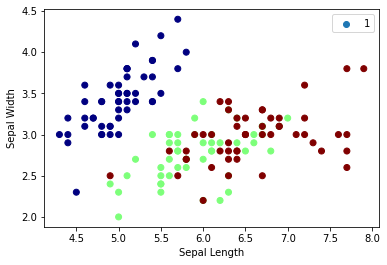

In [19]:
labels = kmean.labels_

plt.scatter(x[:,0], x[:,1,], c=y, cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()